In [1]:
from torch.utils.data import Dataset
from torch.nn import functional as F
from scipy.interpolate import interp1d
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision

C:\Users\Witty\AppData\Roaming\Python\Python37\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
from ultralytics import YOLO

try:
    model = YOLO('yolov8l.pt')
    model.to(device)
    model.train(data='./data.yaml', epochs=50, imgsz=640)
except Exception as e:
        print(f"Error processing {e}")

New https://pypi.org/project/ultralytics/8.2.31 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145  Python-3.7.12 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8l.pt, data=./data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=

In [7]:
from ultralytics import YOLO
model = YOLO('./runs/detect/train/weights/best.pt')
results = model.val(data='./data.yaml', split="test", save=True, save_txt=True)

Ultralytics YOLOv8.0.196  Python-3.11.3 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Model summary (fused): 268 layers, 43610463 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning C:\Users\jason\OneDrive - 淡江大學\桌面\大三下\人工智慧\期末報告\yolov8l_v3_new\test\labels.cache... 93 images, 0 backgrounds, 0 corrupt: 100%|██████████| 93/93 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:12<00:00, 12.13s/it]
                   all         93       1292      0.792      0.801        0.8       0.47
             black-hat         93        263      0.845      0.745      0.795      0.362
           bodysurface         93        673      0.859      0.845      0.871      0.563
             bodyunder         93         77      0.452      0.701      0.571      0.305
                umpire         93         65      0.933      0.969      0.953      0.763
             white-hat         93        214      0.874   

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Extract metrics
mAP_50 = results.box.ap50
mAP_50_95 = results.box.ap
precision, recall = results.box.p, results.box.r
class_names = results.names

overall_mAP_50 = np.mean(mAP_50)
overall_mAP_50_95 = np.mean(mAP_50_95)
overall_precision = np.mean(precision)
overall_recall = np.mean(recall)

mAP_50 = np.concatenate((mAP_50, np.array([overall_mAP_50])))
mAP_50_95 = np.concatenate((mAP_50_95, np.array([overall_mAP_50_95])))
precision = np.concatenate((precision, np.array([overall_precision])))
recall = np.concatenate((recall, np.array([overall_recall])))
class_names[5] = 'Overall'

print(mAP_50)
print(mAP_50_95)
print(precision)
print(recall)
print(class_names)

[    0.79545     0.87097     0.57149     0.95275     0.80964     0.80006]
[     0.3623     0.56265      0.3054     0.76277     0.35794     0.47021]
[    0.84471     0.85896     0.45242     0.93269     0.87359     0.79247]
[    0.74458     0.84547      0.7013     0.96923     0.74299     0.80071]
{0: 'black-hat', 1: 'bodysurface', 2: 'bodyunder', 3: 'umpire', 4: 'white-hat', 5: 'Overall'}


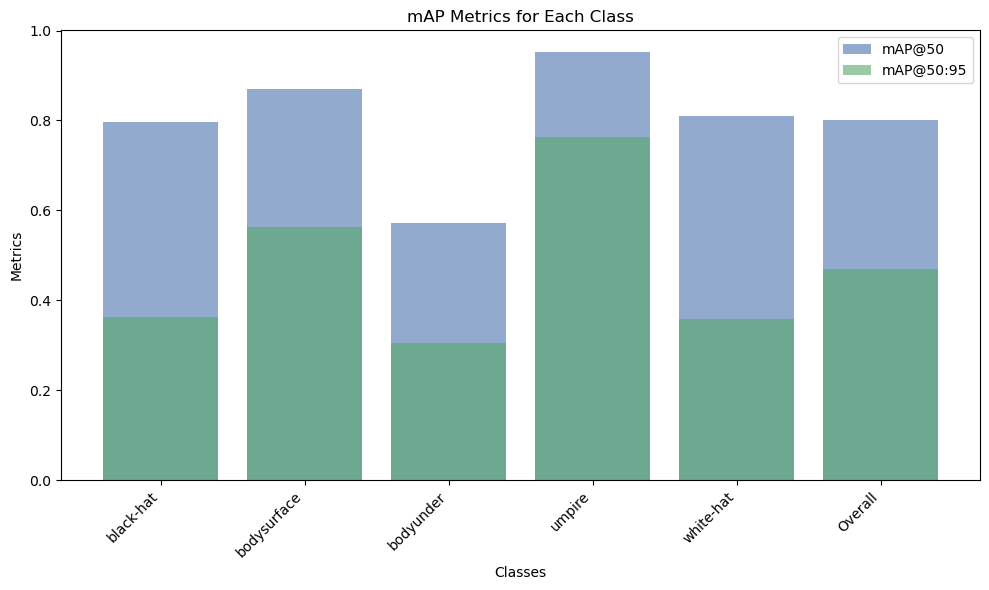

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(class_names)), mAP_50, color='b', alpha=0.6, label='mAP@50')
plt.bar(np.arange(len(class_names)), mAP_50_95, color='g', alpha=0.6, label='mAP@50:95')
plt.xticks(np.arange(len(class_names)), class_names.values(), rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Metrics')
plt.title('mAP Metrics for Each Class')
plt.legend()
plt.tight_layout()
plt.show()

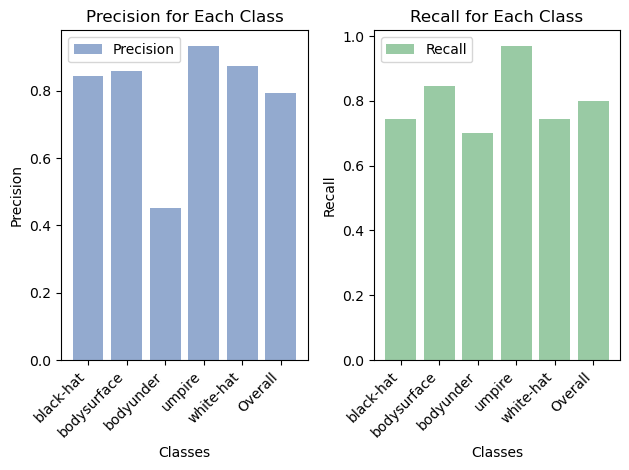

In [10]:
# Plot precision
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(class_names)), precision, color='b', alpha=0.6, label='Precision')
plt.xticks(np.arange(len(class_names)), class_names.values(), rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision for Each Class')
plt.legend()

# Plot recall
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(class_names)), recall, color='g', alpha=0.6, label='Recall')
plt.xticks(np.arange(len(class_names)), class_names.values(), rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall for Each Class')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
%%capture
model.predict(source='./test/images', save=True, save_txt=True)


image 1/93 C:\Users\jason\OneDrive - \\\\\yolov8l_v3_new\test\images\7Collines19_100-NL-FINALE-A-METTELA-MIGNON_399_jpg.rf.ef7dcc5994eb48607b7dcc0ac39bcf8d.jpg: 640x640 8 bodysurfaces, 611.9ms
image 2/93 C:\Users\jason\OneDrive - \\\\\yolov8l_v3_new\test\images\7Collines19_100-PAP-SERIES-RENARD-HERLEM_1249_jpg.rf.6cecb016f5c46bf7b977ef87b0bba6c3.jpg: 640x640 9 bodysurfaces, 633.2ms
image 3/93 C:\Users\jason\OneDrive - \\\\\yolov8l_v3_new\test\images\7Collines19_200-BRA-M-SERIES-VIQUERAT-MARC_2599_jpg.rf.5541abf9024414b905c9b78651af844a.jpg: 640x640 8 bodysurfaces, 664.6ms
image 4/93 C:\Users\jason\OneDrive - \\\\\yolov8l_v3_new\test\images\7Collines19_200-BRA-M-SERIES-VIQUERAT-MARC_499_jpg.rf.ab4fd8e1b7b6aa9e0017fd6326f9f372.jpg: 640x640 4 bodysurfaces, 4 bodyunders, 688.8ms
image 5/93 C:\Users\jason\OneDrive - \\\\\yolov8l_v3_new\test\images\Angers19_100-BRASSE-DAMES-SERIE-7_1249_jpg.rf.1a16be0ba8af73b0b130535764311452.jpg: 640x640 9 bodysurfaces, 686.7ms
image 6/93 C:\Users\jason\On